<a href="https://colab.research.google.com/github/lamini-H/ML_Projects/blob/main/Breast_Cancer_Classification_using_microcalfications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Group Members
* Harunah Lamini
* Lani Xavierraj Tamilarasi Angel

### Task One
* Classify individual micros assuming all micros per subject have the same level
<p>In this task we are using various techniques and process to classify the individual micros per subject</p>

### Import relevant libraries

In [ ]:
#Import from the sklearn library
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import  GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier


### Loading the dataset and showing 10 top records

In [ ]:
path = 'brestdataset.csv' #path of the dateset in the directory
raw_data = pd.read_csv(path) # Reading the dataset using pandas
raw_data.head(10) #showing top 10 rows of teh dataset

,Patient ID,original_shape_Elongation,original_firstorder_Kurtosis,original_firstorder_Skewness,wavelet-LHL_glrlm_RunVariance,wavelet2-LHL_gldm_LargeDependenceEmphasis,wavelet2-LLH_gldm_LargeDependenceEmphasis,wavelet-LHL_gldm_LargeDependenceEmphasis,wavelet2-LHL_gldm_DependenceVariance,wavelet2-LHL_glrlm_RunVariance,...,wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis,wavelet2-HHH_firstorder_RootMeanSquared,wavelet2-LLH_firstorder_Kurtosis,wavelet-HHL_glcm_Imc2,wavelet2-LHH_firstorder_RobustMeanAbsoluteDeviation,original_shape_SphericalDisproportion,wavelet2-HHL_glcm_Idmn,wavelet2-LHH_firstorder_RootMeanSquared,wavelet2-HLL_firstorder_Maximum,Label
0,1,0.661690,2.817688,0.769536,7.257078,3381.734540,3715.077716,3546.818663,634.748331,6.682128,...,4005.210235,0.408974,2.949406,0.231474,0.473838,1.572473,0.983853,0.875074,142.866201,0
1,1,0.750849,2.084800,0.442780,3.137745,2653.808184,1443.697357,2297.305200,616.359443,4.095513,...,32.058217,0.282009,2.790798,0.010531,0.401979,1.178144,0.905124,0.696716,21.693040,0
2,1,0.619781,2.590759,0.384512,7.005413,3551.125894,3568.780890,3342.865490,426.661231,8.535867,...,63032.030210,0.442902,3.211156,0.276207,0.446076,1.615550,0.993054,0.832938,163.039718,0
3,2,0.388733,2.932863,0.738215,2.178815,1564.039548,1370.065913,1839.930320,318.122386,1.939531,...,147.649047,0.330143,3.054401,0.023870,0.399957,1.306885,0.911141,0.727764,22.979554,0
4,2,0.820531,2.814081,0.773252,1.316850,1377.981413,1005.602230,1164.799257,325.473446,1.726775,...,65.872763,0.278449,2.074076,0.016973,0.350459,1.165727,0.906515,0.606753,24.490320,0
5,2,0.874692,2.462236,0.680541,1.426304,626.982301,667.371681,1494.646018,150.352259,0.949001,...,10.258797,0.298587,2.383031,0.048223,0.807968,1.122239,0.986814,1.316034,54.286905,0
6,2,0.756070,2.299499,0.547184,4.974819,1649.686518,2489.158809,2918.393714,185.500663,2.795822,...,468.516203,0.464524,1.954110,0.433294,0.737680,1.147527,0.954221,1.280451,252.052123,0
7,2,0.953401,1.715593,-0.142132,13.807245,3829.905652,3711.877436,4622.891015,680.628601,10.396367,...,64.302369,0.442847,7.892000,0.038653,0.480786,1.134384,0.920320,0.886174,42.677596,0
8,2,0.938459,2.035770,0.397911,5.764751,3485.948749,4242.507995,3448.603116,691.792556,6.472380,...,89.642350,0.223507,3.176528,0.003641,0.277845,1.120847,0.906544,0.496345,27.547550,0
9,2,0.775092,2.470376,0.620126,5.745504,1775.190018,4587.354781,3403.459411,426.494206,2.442605,...,208.423462,0.389967,7.967226,0.052857,0.379628,1.188285,0.925587,0.680251,70.192238,0


### Describing the dataset and some statistics of the dataset

In [ ]:
#Getting information about the data which includes datatypes, number of entries memory usage
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3562 entries, 0 to 3561
Columns: 152 entries, Patient ID to Label
dtypes: float64(150), int64(2)
memory usage: 4.1 MB


In [ ]:
#Describing the statistical information of the data
raw_data.describe()

,Patient ID,original_shape_Elongation,original_firstorder_Kurtosis,original_firstorder_Skewness,wavelet-LHL_glrlm_RunVariance,wavelet2-LHL_gldm_LargeDependenceEmphasis,wavelet2-LLH_gldm_LargeDependenceEmphasis,wavelet-LHL_gldm_LargeDependenceEmphasis,wavelet2-LHL_gldm_DependenceVariance,wavelet2-LHL_glrlm_RunVariance,...,wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis,wavelet2-HHH_firstorder_RootMeanSquared,wavelet2-LLH_firstorder_Kurtosis,wavelet-HHL_glcm_Imc2,wavelet2-LHH_firstorder_RobustMeanAbsoluteDeviation,original_shape_SphericalDisproportion,wavelet2-HHL_glcm_Idmn,wavelet2-LHH_firstorder_RootMeanSquared,wavelet2-HLL_firstorder_Maximum,Label
count,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,...,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000
mean,43.568782,0.666190,2.462975,0.590587,4.212117,1497.921542,1594.268004,2119.089859,271.458163,2.968610,...,263.808079,0.351824,3.164037,0.159556,0.458397,1.292847,0.931269,0.905466,73.400175,0.432903
std,24.574284,0.168063,0.546251,0.272699,4.286353,1289.535822,1387.119079,1528.700938,218.219184,3.454322,...,2184.304828,0.216732,1.182988,0.162182,0.243215,0.247532,0.035136,0.512119,81.520035,0.495547
min,1.000000,0.039069,0.000000,-1.005865,0.083283,1.000000,1.000000,1.000000,0.000000,0.054849,...,0.030881,0.058536,1.284810,0.000000,0.122810,0.907201,0.811843,0.234128,3.099939,0.000000
25%,28.000000,0.550945,2.153519,0.450615,0.963731,316.233814,327.236986,637.213037,54.969021,0.654501,...,10.276716,0.191192,2.531290,0.043387,0.322079,1.154897,0.902421,0.628734,22.119894,0.000000
50%,41.000000,0.677985,2.371766,0.580983,2.686606,1247.979233,1297.284496,2121.746770,249.695632,1.718228,...,31.876325,0.295743,2.917387,0.086336,0.410345,1.224399,0.920535,0.801215,35.270240,0.000000
75%,63.000000,0.793857,2.665746,0.726457,6.188729,2428.843419,2579.808868,3397.403762,453.547995,3.987678,...,111.915767,0.468013,3.432697,0.248412,0.530553,1.356257,0.962220,1.035546,102.038460,1.000000
max,96.000000,1.000000,8.111111,2.666667,29.198575,6454.319835,6484.443965,6308.111352,913.448742,31.799360,...,99073.022880,2.957963,22.889047,0.929873,5.265915,3.486119,1.000000,9.730689,675.982582,1.000000


# Data Preprocessing and preparation for machine learning

To begin with our data preparation, we check how the dataset is balanced according to the Labels (Malinagnet and Benign). We count and plot the Malignent and Benign cases in the dataset as shown below


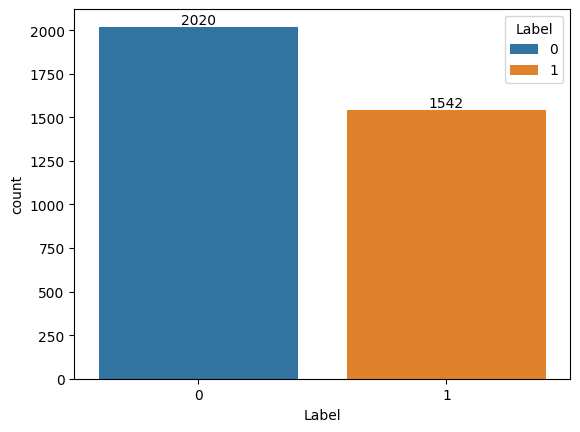

In [ ]:
#visualizing how the data is balance using seaborn
sns.countplot(x='Label', data=raw_data, hue='Label')
value_counts = raw_data['Label'].value_counts()
for i, count in enumerate(value_counts):
                  plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

<p>We observed from the above plot that, there is a quit a challenge as the dataset is not balanced.The are 478 representing 13.4% more cases of the Benign as compare to the Malignent cases.</p>


In other to ensure true independence of the dataset such that, each set (training, validation and testing ) have only one patient we use  this <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GroupShuffleSplit.html">function</a> found in scikit-learn library and reading <a href="https://www.kaggle.com/discussions/general/448072">this article</a> from kaggle

The GroupShuffleSplit serve our purpose well as per the article in kaggle it is useful if you want to split data that contain groups of related entries that should not be mixed across training and testing sets.

In [ ]:
#importing GroupShuffleSplit class from sklearn
from sklearn.model_selection import GroupShuffleSplit
#create an instance of the GroupShufflesSplit
# n_splits=1 specifies the number of re-shuffling and spliting iterations
# 30% is reserved for the testing set, and the rest will be used for training
# the group parameter ensures that all records belonging to the same group(ie. patient id)
#is entirely in either the training set or the testing set, but not both.
group_split = GroupShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

#Split data the on the patient level
for train, test in group_split.split(raw_data, groups= raw_data['Patient ID']):
    #indexing the data by selecting the rows of training and testing from teh raw_data
    train_data = raw_data.iloc[train]
    test_data = raw_data.iloc[test]
#Displaying the  total number or rows and columns training set
print("Training Data")
print(train_data.shape)

#Displaying the  total number or rows and columns testing set
print("\nTesting Data")
print(test_data.shape)

Training Data
(2507, 152)

Testing Data
(1055, 152)


Following the same process, we split the testing set into 50% validation and 50% testing.This will enable us to evaluate the model performance on the validation, do hyperparameter tunning and use the testing set at the very last of the project to test model.\

In [ ]:
#Further splitting the test set for validation
gss_val = GroupShuffleSplit(n_splits=1, test_size=0.5, random_state=42 )
for test_v, val_id in gss_val.split(test_data, groups=test_data['Patient ID']):
    final_test_data = test_data.iloc[test_v]
    val_data =test_data.iloc[val_id]

print("\nValidation Data ")
print(val_data.shape)
print("\nTesting Data ")
print(final_test_data.shape)


Validation Data 
(724, 152)

Testing Data 
(331, 152)


Also, in other for us to evaluate the models prediction and aggregate them in the task two, we followed the previous process to split the validation data into two again. One set is used to evaluate the models in the task one and the other validation set is used to evaluate the models in the second task.

In [ ]:
#Again we split the validation set into two one for the task 1 and the other for task two
gss_val_val = GroupShuffleSplit(n_splits=1, test_size=0.5, random_state=42 )
for task1, task2 in gss_val_val.split(val_data, groups=val_data['Patient ID']):
    task_1_data = val_data.iloc[task1]
    task_2_data =val_data.iloc[task2]

print("\nTask 1 validation set ")
print(task_1_data.shape)
print("\nTask 2 validation set")
print(task_2_data.shape)


Task 1 validation set 
(436, 152)

Task 2 validation set
(288, 152)


In other to check how many unique patient there are in the each of the sets (training,validation and testing) we visualized by plotting  the  the Training, Validation and Testing using bar plot and displaying the total patient number on top of each bar.


<function matplotlib.pyplot.show(close=None, block=None)>

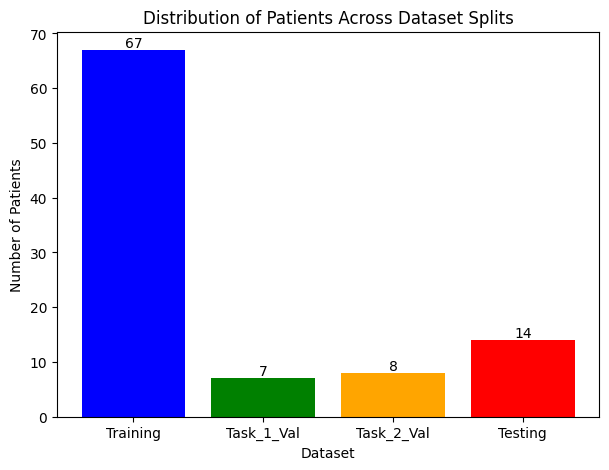

In [ ]:
#Count the number of unique patients in each set
train_patients = train_data['Patient ID'].nunique()
task_one_val =task_1_data['Patient ID'].nunique()
task_two_val =task_2_data['Patient ID'].nunique()
test_patients = final_test_data['Patient ID'].nunique()

#Prepare data for plotting
sets = ['Training','Task_1_Val','Task_2_Val','Testing']
patients_counts = [train_patients,task_one_val,task_two_val,test_patients]

#Creating the bar plot using matplotlib
plt.figure(figsize=(7,5))
bars = plt.bar(sets, patients_counts, color=['blue','green','orange','red'])
plt.xlabel('Dataset')
plt.ylabel('Number of Patients')
plt.title('Distribution of Patients Across Dataset Splits')

#Adding the actual numbers of patients on top of each bar
for bar in bars:
    yvalue = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yvalue, int(yvalue), ha='center',va='bottom')

plt.show


To verify that indeed there are no overlap of patients in any of the sets (training, validation and testing). We wrote the code below. the code puts patients in each  dataset into a set and check the intersections of the various sets. If the len of the intersection are none or zero. then it display there are no overlaps

In [ ]:
#Check to whether there are overlaps of the patient id
train_patient_ids = set(train_data['Patient ID'])
val_patient_ids = set(val_data['Patient ID'])
test_patient_ids = set(final_test_data['Patient ID'])

#Find the intersection of teh various sets
train_val_overlap = train_patient_ids.intersection(val_patient_ids)
train_test_overlap = train_patient_ids.intersection(test_patient_ids)
val_test_overlap = val_patient_ids.intersection(test_patient_ids)

#conditions to check if the sets are empty and display the results
if len(train_val_overlap)==0 and len(train_test_overlap)==0 and len(val_test_overlap)== 0:
    print("There is no overlap of patients in any of  the sets")
else:
    if len(train_val_overlap) ==0:
        print("There is overlap between the training and validation sets")
    elif  len(train_test_overlap) ==0:
        print("There is overlap between the training and testing sets")
    else:
        print("There is overlap between the validation and testing sets")

There is no overlap of patients in any of  the sets


To deal with the class imbalance in the various set
we first visualized the class(benign and malignent) distributions in the various sets

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 800x500 with 0 Axes>

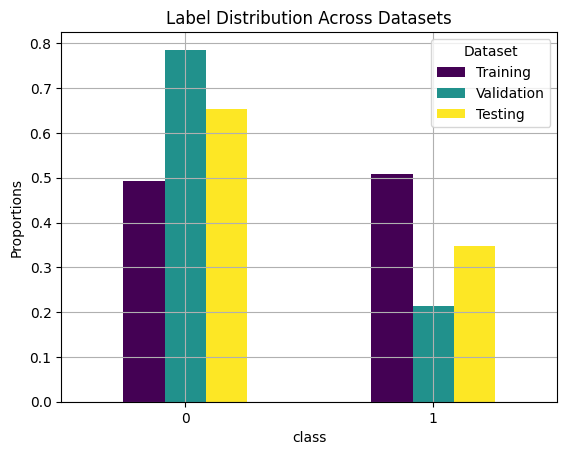

In [ ]:
#Count the propotion of class in each sets (training,validation and testing)
#for simplicity we plotted the validation instead of the two validations
training_label_count = train_data['Label'].value_counts(normalize=True)
validation_label_count = val_data['Label'].value_counts(normalize=True)
test_label_count = final_test_data['Label'].value_counts(normalize=True)

#Create a dictionary and put it in a Dataframe from the counts
df = pd.DataFrame({
    'Training': training_label_count,
    'Validation': validation_label_count,
    'Testing': test_label_count
})
#creating  a bar plot to show the class distributions across the datasets
plt.figure(figsize=(8,5))
df.plot(kind='bar',colormap='viridis')
plt.title('Label Distribution Across Datasets')
plt.ylabel('Proportions')
plt.xlabel('class')
plt.xticks(rotation=0)
plt.grid(True)
plt.legend(title="Dataset")
plt.show

It could be observed from the plot that, the benign cases are higher accros all the sets with the validation haiving almost 80% of the benign cases. On the other hand the training sets have most of the malignent case with little over 50%. Even though the other sets like the validation and testing have an imbalance both case, the training sets is nearly balance between the benign and malignent cases

In other to better understand how is the distribution of the two class is balanced between the training,validation and testing sets. we plotted them separatly to visualized each class in  training, validation and testing using matplotlib with seaborn and pandas

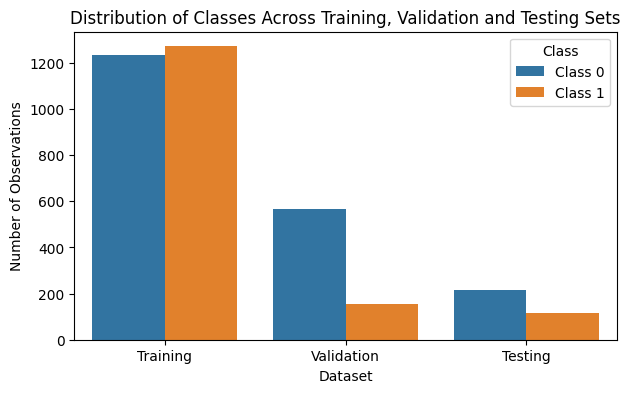

In [ ]:
#Create a dataframe of each subset containing class and holding it in a dictionary (ie data)
data = {
    'Training': pd.DataFrame({'label':train_data['Label']}),
    'Validation': pd.DataFrame({'label':val_data['Label']}),
    'Testing': pd.DataFrame({'label':final_test_data['Label']})
}

#Create a DataFrame for summazaring the count of each class in each dataset
plot_data = pd.DataFrame({
    'Dataset' : ['Training','Validation','Testing'],
    #count the total number of benign cases
    'Class 0': [df['label'].value_counts().get(0,0) for df in data.values()],
    #count the total number of malignent cases
    'Class 1': [df['label'].value_counts().get(1,0) for df in data.values()]
})

#reshape the data for plotting.
#pandas uses melt function transform each row of plot_data to multiple rows in plot_data_melted
#each representing a dataset and class combination with its corresponding count
plot_data_melted = plot_data.melt(id_vars='Dataset', var_name='Class', value_name='Count')

#plotting the data using seabon(barplot) by plotting Dataset in the x-axis and count in the y-axis
plt.figure(figsize=(7,4))
sns.barplot(x='Dataset', y='Count', hue='Class', data=plot_data_melted)
plt.title('Distribution of Classes Across Training, Validation and Testing Sets')
plt.xlabel('Dataset')
plt.ylabel('Number of Observations')
plt.legend('Number of Observation')
plt.legend(title='Class')
plt.show()

From the plot, it could be oberved that the distribution of benign and malignet cases in the training set is  fairly distributed even though the other cases portray a quite imbalance nature.Though is not a perfect balance in the training set, we used it to train the models without applying any technique.

### Segragating Features and Labels
to prepare the training set for training, We first separate the features and labels in each datasets and to ensure that data is randomized while segregating, we shuflling the rows of the dataframe before segragating the features and labels

In [ ]:
#Shuffle the training data
#randomly sample items and shuffles the entire DataFrame and return the same data
#reset_index() resets the dataframe's index to the default integer index
#drop=True avoid the old index being added as column in the dataframe
train_data_shuffled = train_data.sample(frac=1, random_state=42).reset_index(drop=True)

#Segregating the features and labels
X_train = train_data_shuffled.drop(['Patient ID','Label'], axis=1)
y_train= train_data_shuffled['Label']


#We do the same process for the validation and testing set
task_1_val_shuffled =  task_1_data.sample(frac=1, random_state=42).reset_index(drop=True)
test_data_shuffled = final_test_data.sample(frac=1, random_state=42).reset_index(drop=True)
task_2_val_shuffled = task_2_data.sample(frac=1, random_state=42).reset_index(drop=True)
#

#Segregating the features
X_val = task_1_val_shuffled.drop(['Patient ID','Label'], axis=1)
y_val= task_1_val_shuffled['Label']

#Segregating for features and labels for task two (used later)
X_val_2 = task_2_val_shuffled.drop(['Patient ID','Label'], axis=1)
y_val_2= task_2_val_shuffled['Label']

#Segregating the features and labels
X_test = test_data_shuffled.drop(['Patient ID','Label'], axis=1)
y_test= test_data_shuffled['Label']


## Model Setup and  Training
In in the part of the project we begin to initialized and train and our selected models. Based on this paper[3], we selected support vector classifier, random forest classifier and adaboost.

Scaling the data helps the models to learn more effectively and from [4] scaling helps optimization algorithm to converge faster, it managers outlier effects and prevents bias from variables with larger ranges. We therefore scaled all our features in the various  datasets

In [ ]:
#creating an instance of the StandardScaler()
scaler = StandardScaler()
#scaling X_train
X_train_scaled = scaler.fit_transform(X_train)
#scaling X_validation for task 1
X_val_scaled_task_1 = scaler.fit_transform(X_val)
#scaling X_test
X_test_scaled = scaler.fit_transform(X_test)
#scaling X_validation for task 2
X_val_2_scaled = scaler.fit_transform(X_val_2)

The first model we set out and train is the support vector classifier

In [ ]:
#Define models
svc_model = SVC(random_state=42,probability=True)
#training the model
svc_model.fit(X_train_scaled ,y_train)

SVC(probability=True, random_state=42)

The second model we train is Random Forest Classifier

In [ ]:
#Train models
rf_model = RandomForestClassifier(random_state=42)
#training the model
rf_model.fit(X_train_scaled ,y_train)


RandomForestClassifier(random_state=42)

The last model we setup and train is the Adaboost

In [ ]:
#Train models
ada_classifier = AdaBoostClassifier(n_estimators=100,random_state=42, algorithm="SAMME")
#training the model
ada_classifier.fit(X_train_scaled,y_train)

AdaBoostClassifier(algorithm='SAMME', n_estimators=100, random_state=42)

## Evaluation of the models
To better understand how the trained models are performing we have to used various metrices to access the modesl performance on the validation set. To do this we would first define two function namely evaluate_model and plot_learning_curve which will basically display the classification report and display the confusion matrix and the plot_learning_curve will be used to check if the model is overfitting .

creating the the evaluate_model function

In [ ]:
def evaluate_model(model, X_val,y_val):
    predictions = model.predict(X_val)

    #Print the classification report
    accuracy_report = classification_report(y_val, predictions)
    print("Classification report:\n" , accuracy_report)

    # #Display the ROC curve
    # RocCurveDisplay.from_predictions(y_val,predictions)

    #Display the Recall and Precision
    # PrecisionRecallDisplay.from_estimator(model, X_val,y_val, plot_chance_level=True)

    #Compute and display the confusion matrix
    cm = confusion_matrix(y_val, predictions, labels=model.classes_,normalize='true')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()

    return None

### Making prediction and Evaluating the support vector classifier model using the Validation data set


Classification report:
               precision    recall  f1-score   support

           0       0.98      0.67      0.80       372
           1       0.33      0.94      0.49        64

    accuracy                           0.71       436
   macro avg       0.66      0.80      0.64       436
weighted avg       0.89      0.71      0.75       436



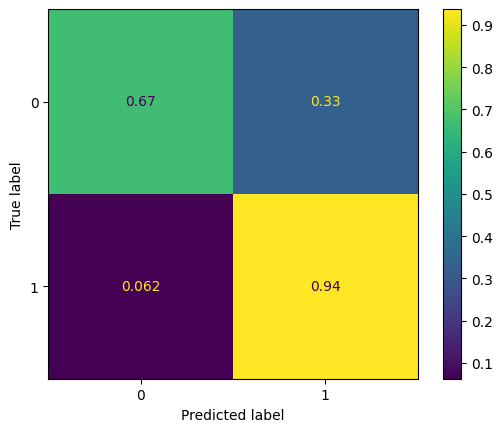

In [ ]:
evaluate_model(svc_model, X_val_scaled_task_1,y_val)

### Making prediction and Evaluating the random forest classifier model using the Validation data set

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.66      0.79       372
           1       0.31      0.89      0.46        64

    accuracy                           0.69       436
   macro avg       0.64      0.77      0.62       436
weighted avg       0.87      0.69      0.74       436



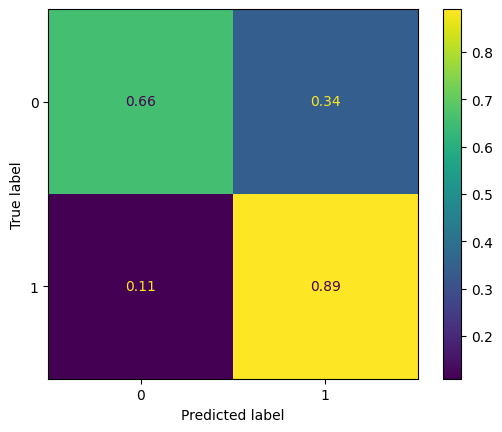

In [ ]:
#Making predictions and evaluating the support vector classifier

evaluate_model(rf_model, X_val_scaled_task_1,y_val)

### Making prediction and Evaluating the adaboost classifier model using the Validation data set


Classification report:
               precision    recall  f1-score   support

           0       0.98      0.45      0.61       372
           1       0.23      0.94      0.36        64

    accuracy                           0.52       436
   macro avg       0.60      0.69      0.49       436
weighted avg       0.87      0.52      0.58       436



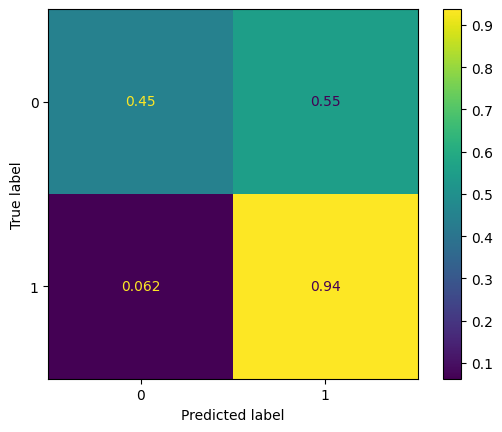

In [ ]:
evaluate_model(ada_classifier, X_val_scaled_task_1,y_val)

After evualuating the models, we observed that the support vector classifier(svc) performed well as compared to the random forest(rf) and adaboost(ada). On accuracy score , svc scored 71% as compared to rf 61% and ada of 52%. However the models seems not to be performaning a well on predicting malignent cases. Even though the models seems to be doing well on  predicting benign cases it appears to have challenges with malignent cases. With svc still leading with 33% of precision of predicting malignent as malignent, rf following with 31% and ada is doing 23% precision.To address this issues, we re-train the model again but this time we use  cross validation with 5 folds and also tune the hyperparameters using grid search to find the best parameters to used for the model. Using cross validation will not only help to make the model robust but it allow you to check how stable and its ability to generalize.

### Hyperparameter Tunning
we use grid search due to it simplist nature to implement and its ability to allow to exhaustively check every combinations of hyperparameter in the specified grid as discussed in this article [5].

In [ ]:

#Dictionary to hold the grid
param_grid_svc = {
    'C':[0.1,1,10], #Regularization parameter
    'kernel':['rbf','poly','sigmoid'], #Type of kernel
    'gamma': ['scale', 'auto'] #Kernel coefficient
}

#GridSearchCV to test all values for n_neighbors using 5 fold cross validation
svc_gs = GridSearchCV(svc_model, param_grid_svc, cv=5, scoring='accuracy',verbose=1, n_jobs=-1)

#Fit model to data
svc_gs.fit(X_train_scaled, y_train)

#Checking the performing n_neigbors value
print("Best Parameters: ", svc_gs.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters:  {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


Searching the best parameters for Random Forset classifier

In [ ]:
#Dictionary to hold the grid
param_grid_rf = {
    'n_estimators':[10,50,100,200],
    'max_features':[None,'sqrt','log2'],
    'max_depth': [None,10,20,30],
    'min_samples_split': [2,5,10]
}

#GridSearchCV to test all values
rf_gs = GridSearchCV(estimator=RandomForestClassifier(random_state=42),param_grid=param_grid_rf,cv=5,scoring='accuracy',verbose=1,n_jobs=-1,error_score='raise')

#Fit model to data
rf_gs.fit(X_train_scaled, y_train)

#Checking the performing n_neigbors value
print("Best Parameters: ", rf_gs.best_params_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}


Searching for the best parameter for AdaBoostClassifier

In [ ]:
#Dictionary to hold the grid
param_grid_ada = {
    'n_estimators':[50,100,200],
    'learning_rate':[0.01,0.1,1.0],
}

#create and instance of the GridSearch  to test all parameters in the grid
gd_search_ada = GridSearchCV(
    estimator=AdaBoostClassifier(random_state=42,algorithm="SAMME"),
    param_grid=param_grid_ada,
    cv=5,
    scoring="accuracy",
    verbose=1
    )

gd_search_ada.fit(X_train_scaled,y_train)

best_classifier =gd_search_ada.best_estimator_

print("Best parameters: ", gd_search_ada.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters:  {'learning_rate': 1.0, 'n_estimators': 200}


Identifying the best parameters according to the grid search and initialized the models for the cross validation

In [ ]:
#import the packages
from sklearn.metrics import roc_curve, auc
#setting up the models
svc_tunned_model = svc_gs.best_estimator_
rf_tunned_model = rf_gs.best_estimator_
ada_tunned_model= gd_search_ada.best_estimator_


To do the training for all models and compare their performance of all the models on various fold. We defined a function and list of models to be used to perform the cross validation and print out the accuracy per fold and also the mean accuracy for each model in the list.

In [ ]:
#importing cross_val_score and KFold from from sklearn
from sklearn.model_selection import cross_val_score

models =[svc_tunned_model,rf_tunned_model ,ada_tunned_model]

def compare_models_cross_validation():
    for model in models:
        cv_scores = cv_scores = cross_val_score(model, X_train_scaled,y_train, cv=5)
        mean_accuracy = (sum(cv_scores)/len(cv_scores))
        mean_accuracy = mean_accuracy * 100
        mean_accuracy = round(mean_accuracy,2)
        print('Cross Validation accuracies for ', model, '= ', cv_scores)
        print('Accuray % of the ', model, mean_accuracy)
        print('----------------------------------------------------------')




In [ ]:
#running the function to execute the scores and average score for each model
compare_models_cross_validation()

Cross Validation accuracies for  SVC(C=1, probability=True, random_state=42) =  [0.73306773 0.75498008 0.73652695 0.74251497 0.76846307]
Accuray % of the  SVC(C=1, probability=True, random_state=42) 74.71
----------------------------------------------------------
Cross Validation accuracies for  RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42) =  [0.74701195 0.78286853 0.76846307 0.74251497 0.76646707]
Accuray % of the  RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42) 76.15
----------------------------------------------------------
Cross Validation accuracies for  AdaBoostClassifier(algorithm='SAMME', n_estimators=200, random_state=42) =  [0.70916335 0.73306773 0.74650699 0.74451098 0.76646707]
Accuray % of the  AdaBoostClassifier(algorithm='SAMME', n_estimators=200, random_state=42) 73.99
----------------------------------------------------------


From the results of the cross validation using 5 fold, we observed that, the Random Forest classifier out performed all the other models with an average accuracy of 75.67% followed by Support Vector Classifier with 74.71% and the AdaboostClassifier is 73.99%. This makes Random forest idle for classifying the data. Even though Random Forest Classifier appears to be the best model according to the accuracy score. We needed to check the models performance on various training set visually to detect overfitting.

To visually inspect the performance of the model as we add more training data and also check if the model is overfitting.We used learning curve to detect whether the model is overfiting and also check it performance. As has been noted by many machine learning practitioners, a constant challenge faced is navigating through overfiting and underfitting. As discused in our leactures Overfitting  can be detected when the model performs very well on the training set but performs poorly on the unseen data thereby making it unable to generalize. Also [6] describe overfiting in his book as when there are high variance in the predicted values (variance describe how scattered your predicted values are in relation to each other) and in contrast underfitting is when there is a high bias (bias refer to the gap between the value predicted by the model and the actual value of the data)


We defined a function to plot the learning curve for the Random forest Classifer

In [ ]:
#importing learning curve from sklearn
from sklearn.model_selection import learning_curve

#define a function to plot the learning curve
def plot_learning_curve(model, X, y, title):

    #generate 5 different sizes to increase the training set from 10% to 100% of the training data
    #evaluating the model train score and test score using the accuracy metric
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 5), scoring='accuracy')

    #Compute the mean and standard deviation of training score across all cross-validation runs for each size of training set
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)

    #Compute the mean and standard deviation of test score across all cross-validation runs for each size of training set
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    #set up the plot with a figure and title, and label the axes
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    #Enable grid for the plot for better readability
    plt.grid()

    #plot the shaded area between mean and standard deviation for training and test scores to visualize the variability of scores
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

    #Plot the mean training and test scores to visualize how they change with the number training examples
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    #add the legend to the plot at the best possible location
    plt.legend(loc="best")

    #return the plot object
    return plt

Plotting the learning curve for the support Vector machine

<module 'matplotlib.pyplot' from 'c:\\Users\\dell\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

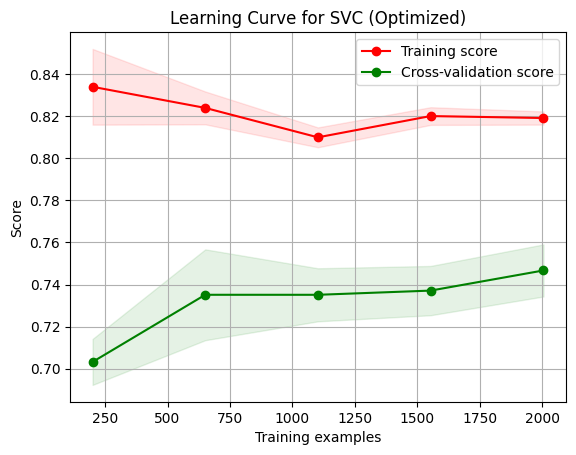

In [ ]:
plot_learning_curve(svc_tunned_model,X_train_scaled,y_train,"Learning Curve for SVC (Optimized)")

Plotting the learning curve for the Random Forest Classifier

<module 'matplotlib.pyplot' from 'c:\\Users\\dell\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

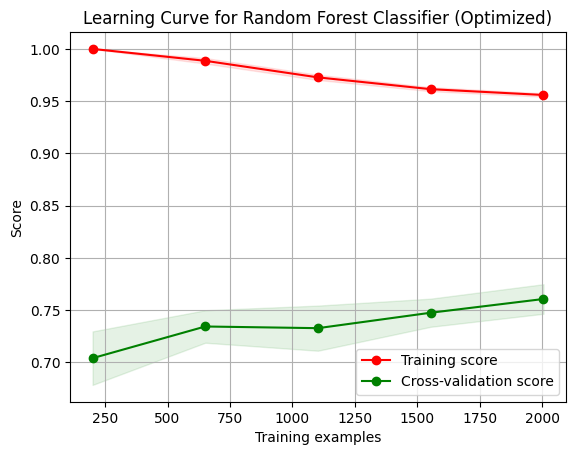

In [ ]:
plot_learning_curve(rf_tunned_model ,X_train_scaled,y_train,"Learning Curve for Random Forest Classifier (Optimized)")

Plotting the learning curve for the Adaboost

<module 'matplotlib.pyplot' from 'c:\\Users\\dell\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

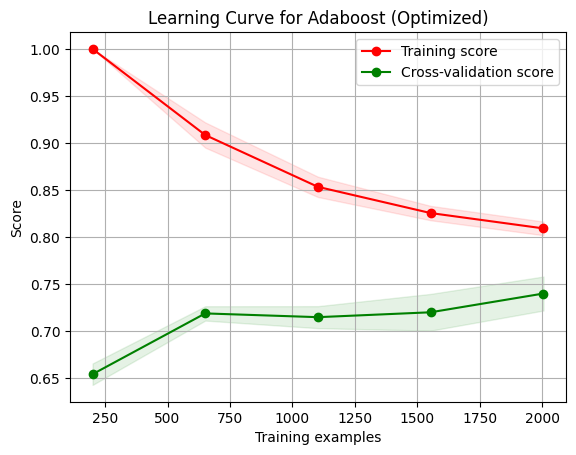

In [ ]:
plot_learning_curve(ada_tunned_model ,X_train_scaled,y_train,"Learning Curve for Adaboost (Optimized)")

From the above plots, we observed that SVC and Random Forest shows improvement in closing the gap between training and cross-validation scores as more data is added compared to AdaBoost. Making it more generalized as compared to adaboost.Also, SVC shows more stability in training scores across different training sizes, suggesting it might be less sensitive to variations in the training data compared to AdaBoost and Random Forest. In the case of overfiting, Random Forest even though appears stable and high training score, shows a substantial gap between the training and cross-validation scores, suggesting some overfiting. Adaboost also indicates overfiting at smaller training sizes, which diminishes slightly as more data is added. Based on the learning curve of SVC, the training data is relatively consistent, even as the size of the training data increases and with regards to the cross-validation score starts at about 70% and shows steady increase, reaching to 78% with the addition of more training examples. This shows upward trend suggests that the model is learning to generalized better from the training data.

Also we assess the overall effectiveness of the models to distinguishe between the malignent and benign cases we used the AUC-ROC curves.The ROC curve plots the true positive rate (sensitivity) against the false positive rate (specificity) at various thresholds settings.

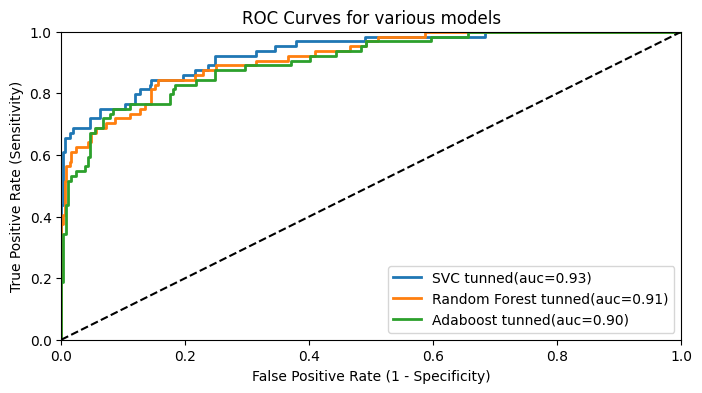

In [ ]:
#importing the necessary packages
from sklearn.metrics import roc_curve, auc


#define the roc_curve function to compute false positive rate, true positive rate and thresholds using roc_curve
def plot_roc_curve(model, X, y, label=None):
    y_scores = model.predict_proba(X)[:,1]
    fpr,tpr,thresholds = roc_curve(y,y_scores)
    roc_auc = auc(fpr,tpr)
    plt.plot(fpr,tpr,linewidth=2, label=f'{label}(auc={roc_auc:.2f})')

#figure size of the graph
plt.figure(figsize=(8,4))

#calling the function on various models
plot_roc_curve(svc_tunned_model,X_val_scaled_task_1,y_val,'SVC tunned')
plot_roc_curve(rf_tunned_model,X_val_scaled_task_1,y_val,'Random Forest tunned')
plot_roc_curve(ada_tunned_model,X_val_scaled_task_1,y_val,'Adaboost tunned')

#set up the plot with a figure and title, and label the axes
plt.plot([0,1],[0,1],'k--') #Dashed diagonal
plt.axis([0,1,0,1])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curves for various models')
plt.legend(loc='lower right')
plt.show()

The ROC curves charts indicates that all three  models SVC, Random Forest and AdaBoost perform well in  distinguishing between positive and negative class, with AUC scores significantly above the baseline of random guessing (AUC=0.5).Thus AUC of 0.5 indicates that the model is not learning anything from the features and is simply guesssing the classes randomly as discussed by the article in [7].Among them, the SVC model exhibits the highest performance with an AUC of 93%, following closely by the Random Forest Model of 91% and AdaBoost model of 90%. This suggest that while all the models appears to be effective, the SVC model stands out as the most capable in terms of sensitivity and specifity for the validation dataset

# Evaluating the models on the test set
Even though all the models perform well, we selected Support vector classifier as the adle model due to its ability to mitigate the overfitting comparatively and also able to generalize according to the learning cures. We therefore do the final evaluation using the test set using the support vector classifier

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.84      0.89       216
           1       0.75      0.90      0.82       115

    accuracy                           0.86       331
   macro avg       0.85      0.87      0.86       331
weighted avg       0.88      0.86      0.87       331



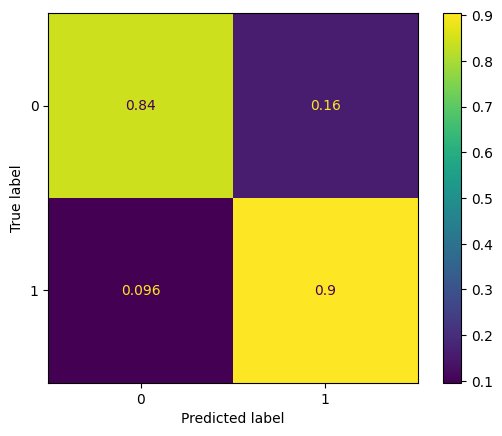

In [ ]:
#Evaluating the support vector classifer in the test set
evaluate_model(svc_tunned_model, X_test_scaled,y_test)

The result show better improvement of the previous model. This

### WORKING ON THE SECOND TASK
Classify whether a subject has cancer based on the classification of the multiple micros per subject.
To tackle this part of the project, We aggregate the predictions from the various models and take the average of prediction and if 50% or more of the models predicting the same values for a particular case, then the we out the majority predictions.In this case the prediction is not be only accurate but also stronger since it be been predicted by the majority of the models.d

We get the Patient IDs and Labels from the original dataset  sets aside for the task 2 and combine into a dataFrame

In [ ]:
#getting the patient ids and labelled from the original dataset
patient_ids = task_2_data['Patient ID']
true_labels = task_2_data['Label']

#creating a dataframe of the patient id and lables
combining_patient_lables = pd.DataFrame({
    'patients_id' : patient_ids,
    'true_labels' : true_labels
})

Predict using each model using the validation set we  set aside for task two

In [ ]:
#predict on the models
svm_preds = svc_tunned_model.predict(X_val_2_scaled )
rf_preds = rf_tunned_model.predict(X_val_2_scaled )
ada_preds = ada_tunned_model.predict(X_val_2_scaled )

We combine the predictions from the various models and calcualte the average predictions

In [ ]:
#Combine predictions into a DataFrame
predictions_df = pd.DataFrame({
    'svm_preds' : svm_preds,
    'rf_preds' : rf_preds,
    'ada_preds' : ada_preds
})
# Calculating the average of teh predictions
predictions_df['average_prediction'] = predictions_df.mean(axis=1)

we apply Majority rule such that if two of the models predict the same for a particular case, then we then it becomes the final prediction. if we get 50% or more of a particular case say 1 then then 1 becomes the final prediction and vice versa

In [ ]:
#Apply threshold to get final predictions
predictions_df['final_models_pred'] = (predictions_df['average_prediction']>=0.5).astype(int)

Here we reset index and drop the old index such that we can maintain the originality of the data

In [ ]:
#reseting the index and droping the old index
predictions_df['patient_id'] = patient_ids.reset_index(drop=True)

#reseting the index and droping the old index
predictions_df['original_label'] = true_labels.reset_index(drop=True)

In [ ]:
#Rearrange columns to put 'patient_id' and original label and showing 10 rows
predictions_df = predictions_df[['patient_id','svm_preds','rf_preds','ada_preds','average_prediction','original_label','final_models_pred']]
predictions_df

,patient_id,svm_preds,rf_preds,ada_preds,average_prediction,original_label,final_models_pred
0,1,0,0,1,0.333333,0,0
1,1,0,1,1,0.666667,0,1
2,1,0,0,0,0.000000,0,0
3,5,1,1,0,0.666667,0,1
4,5,1,0,1,0.666667,0,1
...,...,...,...,...,...,...,...
283,86,1,1,1,1.000000,1,1
284,86,1,0,1,0.666667,1,1
285,86,0,0,0,0.000000,1,0
286,86,1,1,1,1.000000,1,1


In [ ]:
#Grouping and counting individual predictions
count_df = predictions_df.groupby('patient_id')['final_models_pred'].value_counts().unstack(fill_value=0)
count_df

final_models_pred,0,1
patient_id,,
1,2,1
5,46,31
12,32,22
32,17,7
43,7,6
46,12,14
70,37,25
86,14,15


In [ ]:
#Calculate the percentage of 1 and preditions for each patient
count_df['percentage_of_ones'] = (count_df[1]/(count_df[0]+count_df[1])) * 100

#Final prediction base  on a threshold criteria
threshold = 60
count_df['final_prediction'] = (count_df['percentage_of_ones']>= threshold).astype(int)

count_df

final_models_pred,0,1,percentage_of_ones,final_prediction
patient_id,,,,
1,2,1,33.333333,0
5,46,31,40.259740,0
12,32,22,40.740741,0
32,17,7,29.166667,0
43,7,6,46.153846,0
46,12,14,53.846154,0
70,37,25,40.322581,0
86,14,15,51.724138,0


So in the end we set a threshold 60% and get the final prediction for a each patient. In this case the model

References

1. Saito, T., & Rehmsmeier, M. (2015). The precision-recall plot is more informative than the ROC plot when evaluating binary classifiers on imbalanced datasets. PloS one, 10(3), e0118432.
2. https://neptune.ai/blog/f1-score-accuracy-roc-auc-pr-auc
3. Brahimetaj, R., Willekens, I., Massart, A., Forsyth, R., Cornelis, J., Mey, J. D., & Jansen, B. (2022). Improved automated early detection of breast cancer based on high resolution 3D micro-CT microcalcification images. BMC cancer, 22(1), 162.
4. https://dataheadhunters.com/academy/scaling-and-normalization-preparing-data-for-analysis/
5. https://www.perplexity.ai/search/why-use-grid-NIHglADxSgWuZ0y7Jrsilg|
6. Machine Learning for Absolute Beginners(Third Edition) - Oliver Theobald
7. https://docs.aws.amazon.com/machine-learning/latest/dg/binary-model-insights.html